**THỰC HIỆN PHÂN LOẠI VỚI MULTI CLASS SVM, SAU ĐÓ SO SÁNH VỚI SOFTMAX REGRESSION**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("D:/HUS_22001541/MachineLearning/Project/data/ObesityDataSet_raw_and_data_sinthetic.csv", header=0)
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
from sklearn.preprocessing import LabelEncoder

# gender calc caec mtrans

# one hot
data_encoded = pd.get_dummies(data, columns=['Gender', 'CALC', 'CAEC', 'MTRANS'], drop_first=True)

# label encoder
label_encoder = LabelEncoder()
cols_to_encode = ['FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'NObeyesdad']

for col in cols_to_encode:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

# print(data_encoded.head())
data_encoded.head()

,Age,Height,Weight,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,...,CALC_Frequently,CALC_Sometimes,CALC_no,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,0,170,477,0,0,549,1,...,False,False,True,False,True,False,False,False,True,False
1,21.0,1.52,56.0,0,809,477,1,1,1267,1,...,False,True,False,False,True,False,False,False,True,False
2,23.0,1.80,77.0,0,170,477,0,0,549,1,...,True,False,False,False,True,False,False,False,True,False
3,27.0,1.80,87.0,0,809,477,0,0,549,0,...,True,False,False,False,True,False,False,False,False,True
4,22.0,1.78,89.8,0,170,0,0,0,549,0,...,False,True,False,False,True,False,False,False,True,False


In [4]:
data = data_encoded

In [5]:
data.head()

,Age,Height,Weight,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,...,CALC_Frequently,CALC_Sometimes,CALC_no,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,0,170,477,0,0,549,1,...,False,False,True,False,True,False,False,False,True,False
1,21.0,1.52,56.0,0,809,477,1,1,1267,1,...,False,True,False,False,True,False,False,False,True,False
2,23.0,1.80,77.0,0,170,477,0,0,549,1,...,True,False,False,False,True,False,False,False,True,False
3,27.0,1.80,87.0,0,809,477,0,0,549,0,...,True,False,False,False,True,False,False,False,False,True
4,22.0,1.78,89.8,0,170,0,0,0,549,0,...,False,True,False,False,True,False,False,False,True,False


In [6]:
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Dùng softmax

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=400)

log_reg_model.fit(X_train, y_train)

y_pred_softmax = log_reg_model.predict(X_test)

print(classification_report(y_test, y_pred_softmax))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        86
           1       0.43      0.34      0.38        93
           2       0.30      0.32      0.31       102
           3       0.57      0.64      0.60        88
           4       0.78      1.00      0.88        98
           5       0.31      0.17      0.22        88
           6       0.27      0.29      0.28        79

    accuracy                           0.50       634
   macro avg       0.47      0.50      0.48       634
weighted avg       0.48      0.50      0.48       634



c:\Users\Admin\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Admin\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


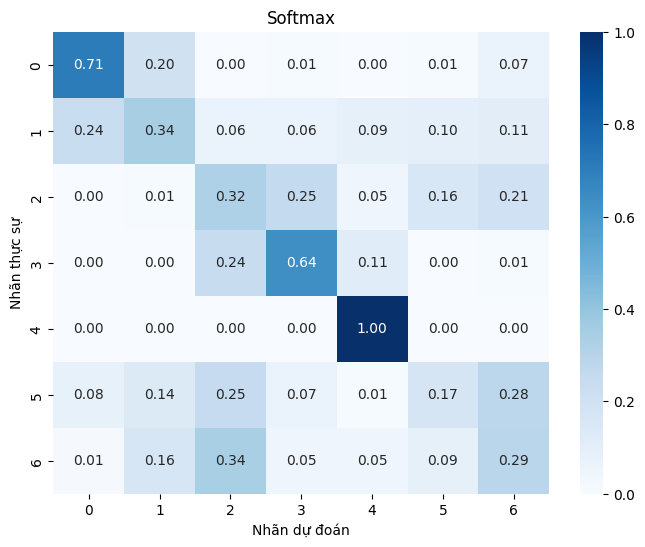

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_softmax)

# Chuyển đổi ma trận nhầm lẫn thành tỷ lệ phần trăm
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Chuyển thành tỷ lệ

# Vẽ Confusion Matrix chuẩn hóa
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=log_reg_model.classes_, yticklabels=log_reg_model.classes_)
plt.xlabel('Nhãn dự đoán')
plt.ylabel('Nhãn thực sự')
plt.title('Softmax')
plt.show()


Dùng SVM Multi Class

In [10]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', decision_function_shape='ovr')

svm_model.fit(X_train, y_train)

y_pred_ovr = svm_model.predict(X_test)

print(classification_report(y_test, y_pred_ovr))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        86
           1       0.81      0.71      0.76        93
           2       0.89      0.90      0.90       102
           3       0.94      1.00      0.97        88
           4       1.00      1.00      1.00        98
           5       0.76      0.81      0.78        88
           6       0.82      0.75      0.78        79

    accuracy                           0.87       634
   macro avg       0.87      0.87      0.87       634
weighted avg       0.87      0.87      0.87       634



Class 0 accuracy: 93.02%
Class 1 accuracy: 70.97%
Class 2 accuracy: 90.20%
Class 3 accuracy: 100.00%
Class 4 accuracy: 100.00%
Class 5 accuracy: 80.68%
Class 6 accuracy: 74.68%


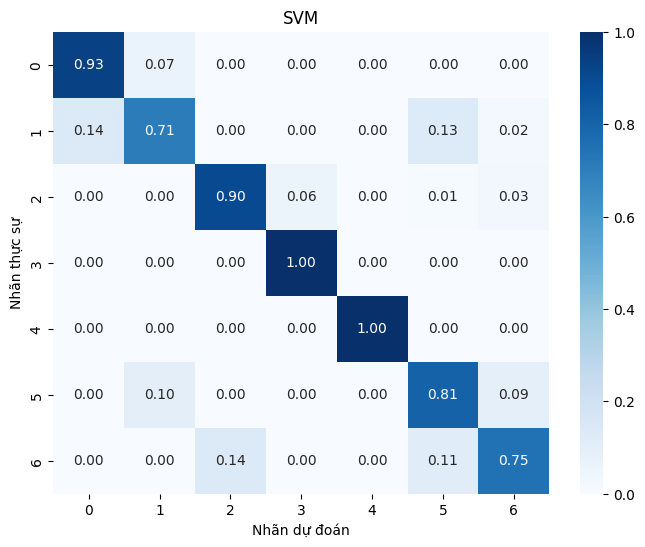

In [11]:
# Tạo confusion matrix
cm = confusion_matrix(y_test, y_pred_ovr)

# Tính tỷ lệ đúng (accuracy) cho từng lớp
accuracy_per_class = cm.diagonal() / cm.sum(axis=1)

# In ra tỷ lệ đúng cho từng lớp
for i, accuracy in enumerate(accuracy_per_class):
    print(f"Class {i} accuracy: {accuracy * 100:.2f}%")

# Vẽ confusion matrix dưới dạng tỷ lệ
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Chuyển đổi thành tỷ lệ

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(len(cm)), yticklabels=range(len(cm)))
plt.title('SVM')
plt.xlabel('Nhãn dự đoán')
plt.ylabel('Nhãn thực sự')
plt.show()


In [12]:
from sklearn.svm import SVC

svm_model_rbf = SVC(kernel='rbf', decision_function_shape='ovr')

svm_model_rbf.fit(X_train, y_train)

y_pred_rbf = svm_model_rbf.predict(X_test)

print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.37      0.38      0.38        86
           1       0.39      0.16      0.23        93
           2       0.41      0.56      0.47       102
           3       0.53      0.72      0.61        88
           4       0.69      1.00      0.81        98
           5       0.28      0.12      0.17        88
           6       0.23      0.19      0.21        79

    accuracy                           0.46       634
   macro avg       0.41      0.45      0.41       634
weighted avg       0.42      0.46      0.42       634



In [13]:
svm_model_ovo = SVC(kernel='linear', decision_function_shape='ovo')
svm_model_ovo.fit(X_train, y_train)

y_pred_ovo = svm_model_ovo.predict(X_test)

print(classification_report(y_test, y_pred_ovo))


              precision    recall  f1-score   support

           0       0.86      0.93      0.89        86
           1       0.81      0.71      0.76        93
           2       0.89      0.90      0.90       102
           3       0.94      1.00      0.97        88
           4       1.00      1.00      1.00        98
           5       0.76      0.81      0.78        88
           6       0.82      0.75      0.78        79

    accuracy                           0.87       634
   macro avg       0.87      0.87      0.87       634
weighted avg       0.87      0.87      0.87       634

